In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter, date2num, AutoDateLocator, AutoDateFormatter

In [2]:
# Load john hopkins CSV
data = pd.read_csv(r'https://raw.githubusercontent.com/datasets/covid-19/main/data/time-series-19-covid-combined.csv')

                   

In [3]:
# Just select case data
case_data = data.iloc[:, 0:4]

# Select countries of interest
countries = ['Vietnam', 'Malaysia', 'Philippines', 'Australia']
cases_countries = case_data.loc[case_data['Country/Region'].isin(countries)]

In [4]:
# data check
cases_countries['Country/Region'].value_counts()

# Aus data by states not whole country

Australia      6528
Malaysia        816
Philippines     816
Vietnam         816
Name: Country/Region, dtype: int64

In [5]:
# group by country, to fix aus data
final_cases = cases_countries.groupby(['Date', 'Country/Region'])['Confirmed'].sum().reset_index()

In [6]:
# data check
final_cases['Country/Region'].value_counts()
final_cases.loc[(final_cases['Country/Region'] == "Australia") & (final_cases.Date == "2022-04-10")]

,Date,Country/Region,Confirmed
3236,2022-04-10,Australia,5108366


In [7]:
# convert data to pd.datetime
final_cases.Date = pd.to_datetime(final_cases.Date)
#format='%b/%Y'

In [8]:
# Data current cumulative cases
# # Calculate new cases per day
temp = final_cases.groupby(['Country/Region', 'Date', ])['Confirmed']
temp = temp.sum().diff().reset_index()
mask = temp['Country/Region'] != temp['Country/Region'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
# renaming columns
temp.columns = ['Country/Region', 'Date', 'New_cases']
# merging new values
final_cases = pd.merge(final_cases, temp, on=['Country/Region', 'Date'])
# filling na with 0
final_cases = final_cases.fillna(0)
# fixing data types
cols = ['New_cases']
final_cases[cols] = final_cases[cols].astype('int')
final_cases['New_cases'] = final_cases['New_cases'].apply(lambda x: 0 if x<0 else x)

In [9]:
# Create dataframe for each country and smooth new cases per day to 7-day moving average
vietnam_cases =  final_cases.loc[final_cases['Country/Region'] == 'Vietnam']
vietnam_cases.set_index(vietnam_cases.Date)
vietnam_cases['mov_avg'] = vietnam_cases['New_cases'].rolling(7).mean()
vietnam_cases['mov_avg_pop'] = vietnam_cases['mov_avg']/9.734



malay_cases = final_cases.loc[final_cases['Country/Region'] == 'Malaysia']
malay_cases.set_index(malay_cases.Date)
malay_cases['mov_avg'] = malay_cases['New_cases'].rolling(7).mean()
malay_cases['mov_avg_pop'] = malay_cases['mov_avg']/3.27


phil_cases = final_cases.loc[final_cases['Country/Region'] == 'Philippines']
phil_cases.set_index(phil_cases.Date)
phil_cases['mov_avg'] = phil_cases['New_cases'].rolling(7).mean()
phil_cases['mov_avg_pop'] = phil_cases['mov_avg']/10.96


aus_cases = final_cases.loc[final_cases['Country/Region'] == 'Australia']
aus_cases.set_index(aus_cases.Date)
aus_cases['mov_avg'] = aus_cases['New_cases'].rolling(7).mean()
aus_cases['mov_avg_pop'] = aus_cases['mov_avg']/2.569



C:\Users\ehug0006\Miniconda3\envs\autumn\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ehug0006\Miniconda3\envs\autumn\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\ehug0006\Miniconda3\envs\autumn\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [10]:
phil_cases['mov_avg_pop'].loc[phil_cases.Date=='2021-04-05']

1758    932.012513
Name: mov_avg_pop, dtype: float64

In [11]:
# checking data
vietnam_cases


,Date,Country/Region,Confirmed,New_cases,mov_avg,mov_avg_pop
3,2020-01-22,Vietnam,0,0,NaN,NaN
7,2020-01-23,Vietnam,2,2,NaN,NaN
11,2020-01-24,Vietnam,2,0,NaN,NaN
15,2020-01-25,Vietnam,2,0,NaN,NaN
19,2020-01-26,Vietnam,2,0,NaN,NaN
23,2020-01-27,Vietnam,2,0,NaN,NaN
27,2020-01-28,Vietnam,2,0,0.285714,0.029352
31,2020-01-29,Vietnam,2,0,0.285714,0.029352
35,2020-01-30,Vietnam,2,0,0.000000,0.000000
39,2020-01-31,Vietnam,2,0,0.000000,0.000000


In [12]:
dates = {
    'phil': {
        'max_cases': np.nanmax(phil_cases.mov_avg_pop),
        'variant': {
            'delta': '2021-04-05',
            'omi': '2021-11-15'
        },
        'vax': {
            '0%': '2021-04-05',
            '50%': '2022-01-17'
        }  
    },
    'malay': {
        'max_cases':np.nanmax(malay_cases.mov_avg_pop),
        'variant': {
            'delta': '2021-03-08',
            'omi': '2021-11-01'
        },
        'vax':{
            '0%': '2021-02-24',
            '50%': '2021-09-06',
            '80%': '2022-04-16'
        }
        
    },
    'viet': {
        'max_cases':np.nanmax(vietnam_cases.mov_avg_pop),
        'variant':{
            'delta':'2021-04-19',
            'omi':'2021-12-13'
        },
        'vax':{
            '0%': '2021-04-30',
            '50%': '2021-12-01'
        }
        
    },
    'aus': {
        'max_cases':np.nanmax(aus_cases.mov_avg_pop),
        'variant':{
            'delta':'2021-03-22',
            'omi':'2021-11-15'
        },
        'vax':{
            '0%': '2021-02-23',
            '50%': '2021-10-10',
            '80%': '2022-03-11'
        }
        
    }
}

dates['phil']['variant']

{'delta': '2021-04-05', 'omi': '2021-11-15'}

In [13]:
def get_symbol(variant):
    if variant == 'delta':
        symbol = "δ"
    elif variant == 'omi':
        symbol = "o"
    else:
        symbol = "NA"
    return symbol

In [14]:
# # first delta case each country
# phil_delta = '2021-04-05'
# malay_delta = '2021-03-08'
# viet_delta = '2021-04-19'
# aus_delta = '2021-03-22'

# #first omicron case each country
# phil_omi = '2021-11-15'
# malay_omi = '2021-11-01'
# viet_omi = '2021-12-13'
# aus_omi = '2021-11-15'

C:\Users\ehug0006\Miniconda3\envs\autumn\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


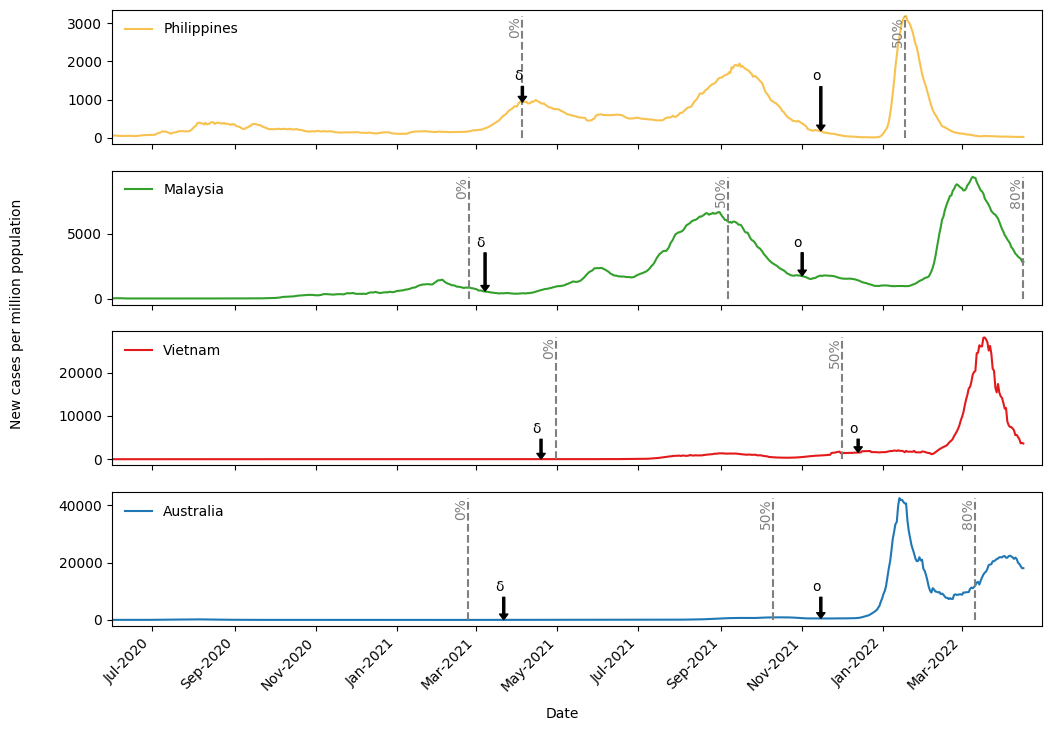

In [15]:
plt.style.use("default")
# plotting countries same axis

# set arrowprop for annotation
arrow = dict(facecolor='black', shrink=0.01, width=1.5, headwidth=6, headlength=4)

#plot style
plt.style.use("_classic_test_patch") #plots in ggplot style, handles dates better


# plotting countries
fig, ax = plt.subplots(4, 1, figsize=(12,8), sharex="all")  # Create a figure and an axes.\


#phili
ax[0].plot(phil_cases.Date, phil_cases.mov_avg_pop, color='#f7c24f', label='Philippines')
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

for variant, date in dates['phil']['variant'].items():
    ax[0].annotate(get_symbol(variant),
                   xy = (date, phil_cases['mov_avg_pop'].loc[phil_cases.Date==date]),
                   xytext=(date, 1500),
                   arrowprops=arrow, ha='right')
for percent, date in dates['phil']['vax'].items():
    ax[0].vlines(x=date, ymin=0, ymax=dates['phil']['max_cases'], ls='dashed', color='grey')
    ax[0].text(x=date, y=dates['phil']['max_cases'], s=percent, ha='right', va='top', rotation='vertical', color='grey')

# malay
ax[1].plot(malay_cases.Date, malay_cases.mov_avg_pop, color='#33a02c', label='Malaysia')
for variant, date in dates['malay']['variant'].items():
    ax[1].annotate(get_symbol(variant),
                   xy = (date, malay_cases['mov_avg_pop'].loc[malay_cases.Date==date]),
                   xytext=(date, 4000),
                   arrowprops=arrow, ha='right')
for percent, date in dates['malay']['vax'].items():
    ax[1].vlines(x=date, ymin=0, ymax=dates['malay']['max_cases'], ls='dashed', color='grey')
    ax[1].text(x=date, y=dates['malay']['max_cases'], s=percent, ha='right', va='top', rotation='vertical', color='grey')       

#vietnam
ax[2].plot(vietnam_cases.Date, vietnam_cases.mov_avg_pop, color='#e31a1c', label='Vietnam')
for variant, date in dates['viet']['variant'].items():
    ax[2].annotate(get_symbol(variant),
                   xy = (date, vietnam_cases['mov_avg_pop'].loc[vietnam_cases.Date==date]),
                   xytext=(date, 6000),
                   arrowprops=arrow, ha='right')
for percent, date in dates['viet']['vax'].items():
    ax[2].vlines(x=date, ymin=0, ymax=dates['viet']['max_cases'], ls='dashed', color='grey')
    ax[2].text(x=date, y=dates['viet']['max_cases'], s=percent, ha='right', va='top', rotation='vertical', color='grey')


# aus cases
ax[3].plot(aus_cases.Date, aus_cases.mov_avg_pop, color='#1f78b4', label='Australia')
for variant, date in dates['aus']['variant'].items():
    ax[3].annotate(get_symbol(variant),
                   xy = (date, aus_cases['mov_avg_pop'].loc[aus_cases.Date==date]),
                   xytext=(date, 10000),
                   arrowprops=arrow, ha='right')
for percent, date in dates['aus']['vax'].items():
    ax[3].vlines(x=date, ymin=0, ymax=dates['aus']['max_cases'], ls='dashed', color='grey')
    ax[3].text(x=date, y=dates['aus']['max_cases'], s=percent, ha='right', va='top', rotation='vertical', color='grey')
    

# formt and plot
fig.text(0.5, -0.005, 'Date', ha='center')
fig.text(0.04, 0.5, 'New cases per million population', va='center', rotation='vertical')
for a in ax.reshape(-1):
    a.tick_params(axis='x', labelrotation=45)
    a.legend(loc='upper left', frameon=False)
    a.set(xlim=('2020-06-01', '2022-04-30'))

    for tick in a.xaxis.get_majorticklabels():
        tick.set_horizontalalignment("right")
plt.show()

In [16]:
np.nanmax(aus_cases.mov_avg_pop)

42512.539620752934